# UCI - Dataset - Preprocessing

### Import 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data Fetching and Cleaning

In [3]:
# get feature names from the file features.txt
features = list()
with open('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features: {}'.format(len(features)))

No of Features: 561


### Duplicate features:

In [4]:
seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

### Obtain the train data

In [6]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# # add subject column to the dataframe
X_train['subject'] = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# # put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5999,0.348423,-0.035846,-0.123457,-0.323899,-0.161238,-0.293632,-0.356498,-0.180647,-0.289808,0.024781,...,-0.670057,-0.156689,0.434946,-0.753786,-0.865629,0.188854,0.038923,27,1,WALKING


In [7]:
train.shape

(7352, 564)

### Obtain the test data

In [8]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
246,0.222945,0.009619,-0.109697,-0.467376,-0.078817,-0.417493,-0.51581,-0.116937,-0.407038,-0.328827,...,0.641818,-0.346751,-0.915181,-0.251066,-0.646604,0.320797,-0.083068,2,1,WALKING


In [9]:
test.shape

(2947, 564)

### 1. Check for Duplicates

In [10]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [11]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


### 3. Check for data imbalance

In [12]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

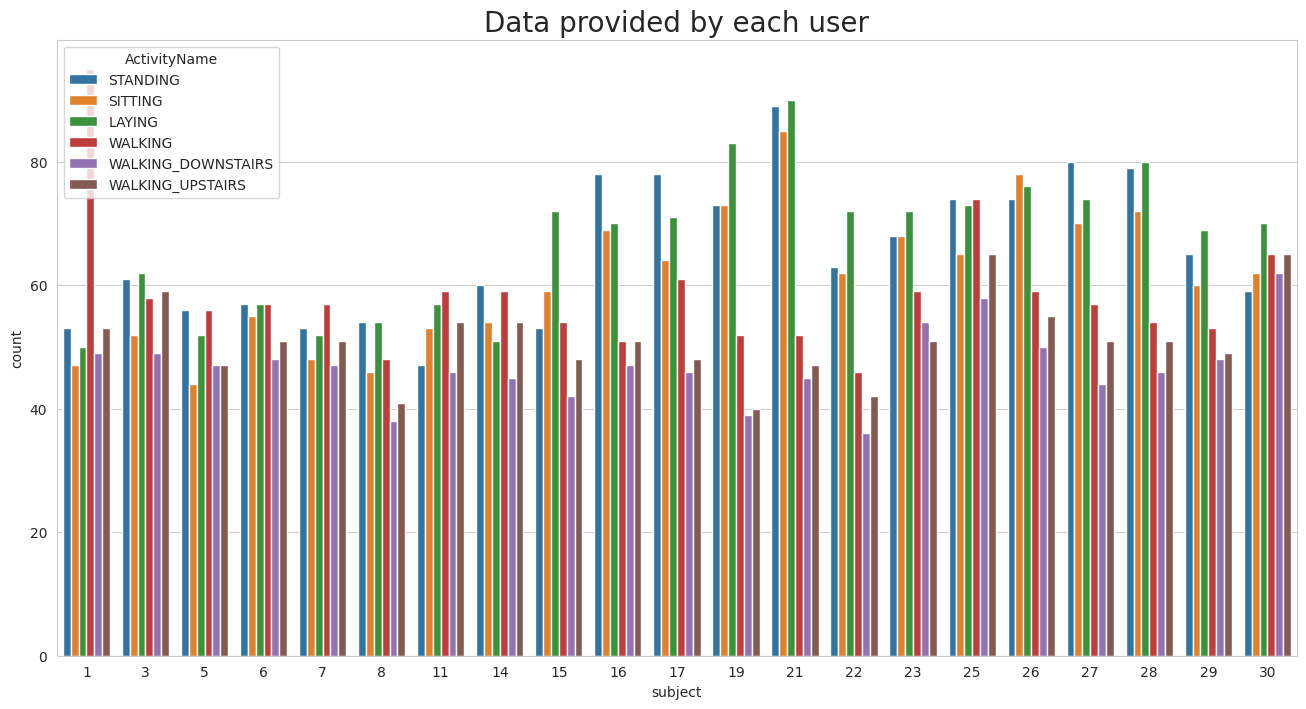

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

#### $~~~~~~~~~~~~~~~~~~~~~~~~~~$ We have got almost same number of reading from all the subjects
$~~~~~~~~~~~$

#### $~~~~~~~~~~~~~~~~~~~~~~~~~$Our data is well balanced (almost)
$~~~~~~~~~~~$

### 4. Changing feature names

In [15]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

C:\Users\dixit\AppData\Local\Temp\ipykernel_28952\71913079.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
C:\Users\dixit\AppData\Local\Temp\ipykernel_28952\71913079.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
C:\Users\dixit\AppData\Local\Temp\ipykernel_28952\71913079.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

### 5. Save this dataframe in a csv files

In [16]:
train.to_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/data/train.csv', index=False)
test.to_csv('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/data/test.csv', index=False)

In [17]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import sklearn
from sklearn import metrics

In [19]:
# Import different classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [20]:
def read_data(file):
    data = pd.read_csv(file)
    
    # suffle data
    data = sklearn.utils.shuffle(data)
    
    X_data = data.drop(['subject', 'Activity', 'ActivityName'], axis=1)
    y_data = data.ActivityName
    
    return np.array(X_data), np.array(y_data)

In [25]:
def train_model(train_x, train_y, model_name='NB', validation=None):
    """
    Possible model names: ['NB', 'SVM', 'XGB', 'MLP', 'ADA', 'BAG', 'RF']
    default = 'NB'
    
    validation: (val_x, val_y) tupple for validation accuracy score.
    
    return: trained model
    """
    model = None
    if model_name == 'SVM':
        model = svm.SVC(gamma='scale', probability=True)
    elif model_name == 'XGB':
        model = XGBClassifier(n_estimators=200, max_depth=5, n_jobs=2)
#         model = XGBClassifier()
    elif model_name == 'MLP':
        model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=800, alpha=0.0001,
                     solver='sgd', verbose=10, tol=0.000000001)
    elif model_name == 'ADA':
        model = AdaBoostClassifier(n_estimators=50)
    elif model_name == 'BAG':
        model = BaggingClassifier(n_jobs=2, n_estimators=50)
    elif model_name == 'RF':
        model = RandomForestClassifier(n_estimators=200, max_depth=10)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    else:
        model = GaussianNB()
    
    model.fit(train_x, train_y)
    
    if validation is not None:
        y_hat = model.predict(validation[0])
        acc = metrics.accuracy_score(validation[1], y_hat)
        print(f"Validation Accuracy in '{model_name}' = {acc}")
        cm = metrics.confusion_matrix(validation[1], y_hat)
        print(cm)
        recall = cm[0][0] / (cm[0][0] + cm[0][1])
        precision = cm[0][0] / (cm[0][0] + cm[1][0])
        f1 = 2*(precision*recall)/(precision+recall)
        print(f"Recall in '{model_name}' = {recall}")
        print(f"Precision in '{model_name}' = {precision}")
        print(f"F1 Score in '{model_name}' = {f1}")
               
    return model

In [28]:
train_X, train_y = read_data('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/data/train.csv')
test_X, test_y = read_data('C:/Users/dixit/Desktop/uci-har dataset/UCI HAR Dataset/data/test.csv')

In [29]:
print("Train  : ", train_X.shape, train_y.shape)
print("Test   : ", test_X.shape, test_y.shape)

Train  :  (7352, 561) (7352,)
Test   :  (2947, 561) (2947,)


In [30]:
train_y

array(['STANDING', 'LAYING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [31]:
model1 = train_model(train_X, train_y, model_name='RF', validation=(test_X, test_y))

Validation Accuracy in 'RF' = 0.9229725144214456
[[537   0   0   0   0   0]
 [  0 433  58   0   0   0]
 [  0  36 496   0   0   0]
 [  0   0   0 482  10   4]
 [  0   0   0  28 345  47]
 [  0   0   0  38   6 427]]
Recall in 'RF' = 1.0
Precision in 'RF' = 1.0
F1 Score in 'RF' = 1.0


In [32]:
model2 = train_model(train_X, train_y, model_name='BAG', validation=(test_X, test_y))

Validation Accuracy in 'BAG' = 0.8975229046487954
[[537   0   0   0   0   0]
 [  0 394  97   0   0   0]
 [  0  60 472   0   0   0]
 [  0   0   0 476  12   8]
 [  0   0   0   7 368  45]
 [  0   0   0  65   8 398]]
Recall in 'BAG' = 1.0
Precision in 'BAG' = 1.0
F1 Score in 'BAG' = 1.0


In [33]:
model3 = train_model(train_X, train_y, model_name='ADA', validation=(test_X, test_y))

Validation Accuracy in 'ADA' = 0.5310485239226331
[[537   0   0   0   0   0]
 [  0   0 491   0   0   0]
 [  0   0 532   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0 420   0   0]
 [  0   0   0 471   0   0]]
Recall in 'ADA' = 1.0
Precision in 'ADA' = 1.0
F1 Score in 'ADA' = 1.0


In [34]:
model4 = train_model(train_X, train_y, model_name='NB', validation=(test_X, test_y))

Validation Accuracy in 'NB' = 0.7702748557855447
[[323 211   0   0   0   3]
 [  5 368 111   0   0   7]
 [  8  54 455   0   0  15]
 [  0   0   0 416  42  38]
 [  0   0   0  80 257  83]
 [  0   0   0   9  11 451]]
Recall in 'NB' = 0.6048689138576779
Precision in 'NB' = 0.9847560975609756
F1 Score in 'NB' = 0.7494199535962879


In [35]:
model5 = train_model(train_X, train_y, model_name='SVM', validation=(test_X, test_y))

Validation Accuracy in 'SVM' = 0.9504580929759077
[[537   0   0   0   0   0]
 [  0 438  51   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   3   5]
 [  0   0   0  10 384  26]
 [  0   0   0  20   0 451]]
Recall in 'SVM' = 1.0
Precision in 'SVM' = 1.0
F1 Score in 'SVM' = 1.0
